# Health check for OpenWPM census crawl data
- Plot metrics related to error, failures and timeouts

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import compute_metrics

In [2]:
METRIC_NAMES = [
    "num_requests",  # total number of requests
    "num_responses",  # total number of responses
    "num_javascript",  # total number of entries in the javascript table
    "rate_requests_without_visit_id",  # rate of requests without a visit_id (i.e. visit_id=-1)
    "rate_responses_without_visit_id",  # rate of responses without a visit_id
    "rate_javascript_without_visit_id",  # rate of javascript without a visit_id
    "rate_cmd_failure_get",  # rate of failed GET commands
    "rate_cmd_failure_browse",  # rate of failed BROWSE commands
    "rate_cmd_failure_dmp_flash_cookies",  # rate of failed DUMP_FLASH_COOKIES commands
    "rate_cmd_timeout_get",  # rate of timed out GET commands
    "rate_cmd_timeout_browse",  # rate of timed out GET commands
    "rate_cmd_timeout_dmp_flash_cookies",  # rate of timed out GET commands
    "rate_visits_without_responses"]  # rate of visits without any responses

In [3]:
def get_metrics_df(crawl_metrics, metric_name, _filter=None):
    """Return a data frame for a given metric and filter (e.g. stateless)."""
    metrics = []
    for crawl_name in sorted(crawl_metrics.keys()):
        metric_value = getattr(crawl_metrics[crawl_name], metric_name)
        if _filter is None:
            metrics.append((crawl_name, metric_value))
        elif _filter in crawl_name:
            metrics.append((crawl_name, metric_value))
    df = pd.DataFrame(metrics)  # create and return a dataframe
    df.columns = ['crawl_name', metric_name]
    return df
    

In [4]:
def plot_all_metrics(crawl_metrics, filter_exp, metrics_to_exclude=[]):
    """Plot metrics for a given filter (crawl type)."""
    for metric_name in METRIC_NAMES:
        # filter out metrics that are irrelevant for this crawl type
        if any(metric_to_exclude in metric_name for metric_to_exclude in metrics_to_exclude):
            continue
        df = get_metrics_df(crawl_metrics, metric_name, filter_exp)
        #print df.describe()  # uncomment to print min, max, std etc.
        sns_plot = sns.barplot(x="crawl_name", y=metric_name, data=df)
        plt.xticks(rotation=90)
        plt.show()


## Read metrics for all crawls

In [8]:
JSON_DIR = "data"
crawl_metrics = compute_metrics.check_jsons_in_dir(JSON_DIR)
print "Metrics for %s crawls are loaded" % len(crawl_metrics)

('2017-03_25k_ID_detection_2', u'http://cityadspix.com', 0, 1, 'requests are missing')
('2017-10_100k_stateful', u'http://xiwuji.com', 0, 1, 'requests are missing')
('2017-10_100k_stateful', u'http://culigo.com', 0, 1, 'requests are missing')
Metrics for 150 crawls are loaded


## Stateless 1M crawls

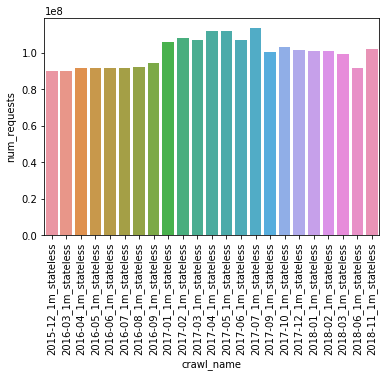

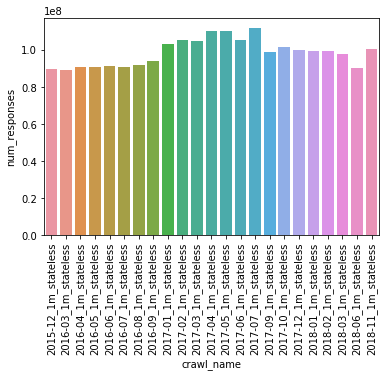

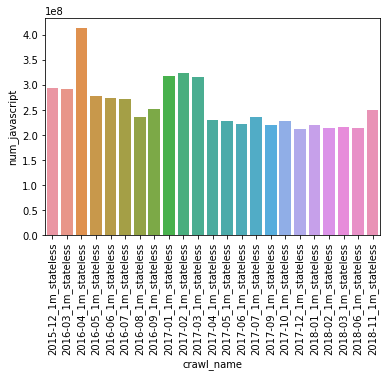

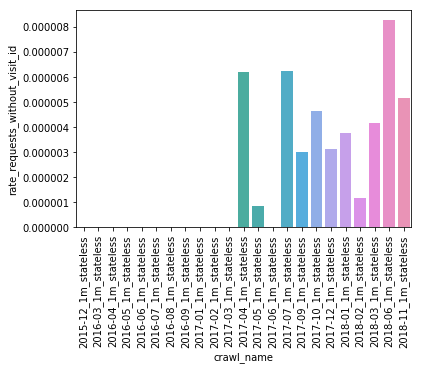

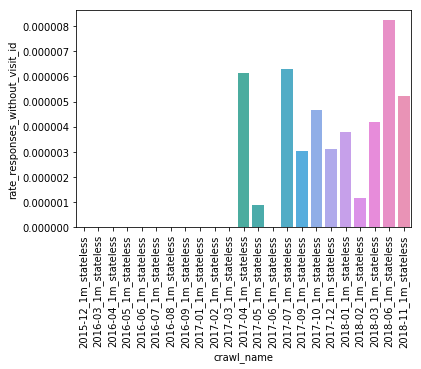

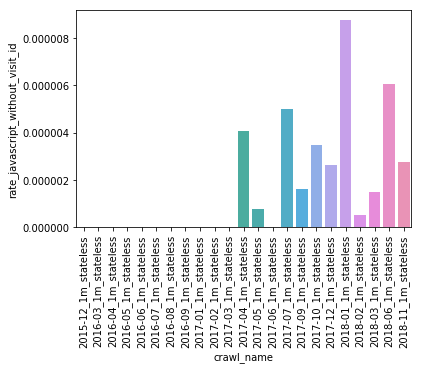

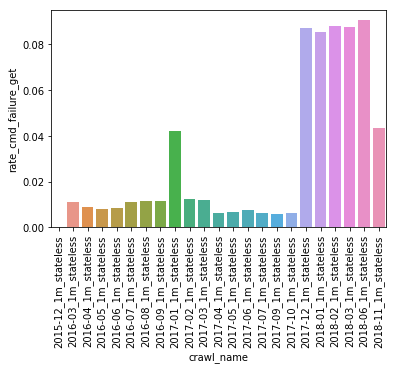

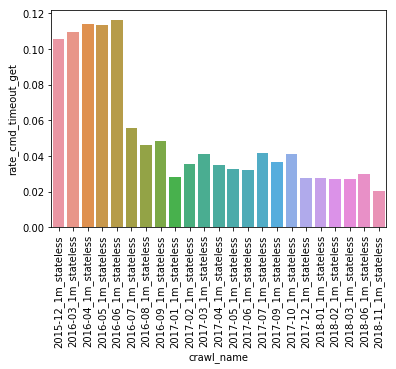

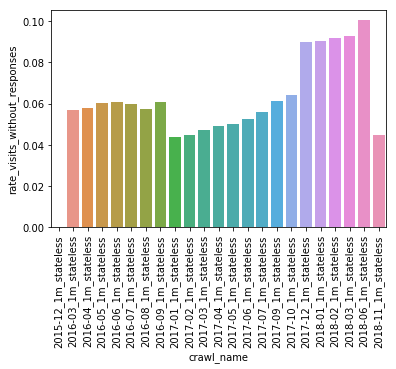

In [9]:
plot_all_metrics(crawl_metrics, "stateless", metrics_to_exclude=["browse", "dmp_flash_cookies"])

## ID_detection crawls

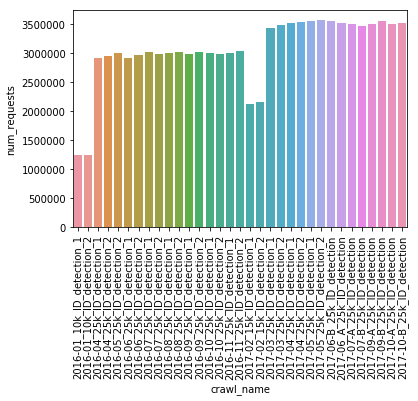

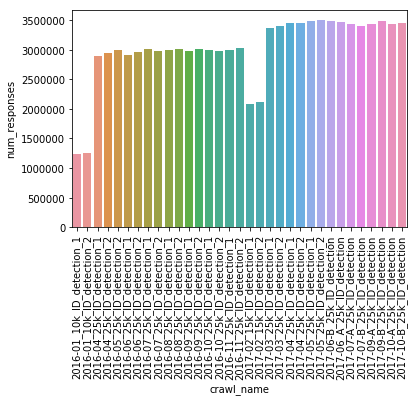

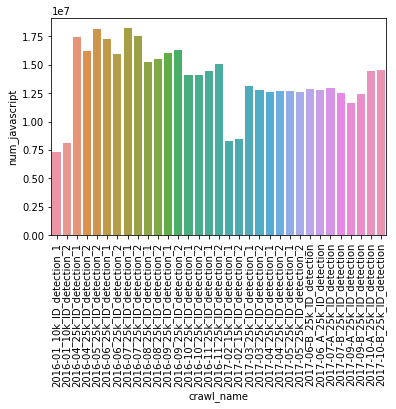

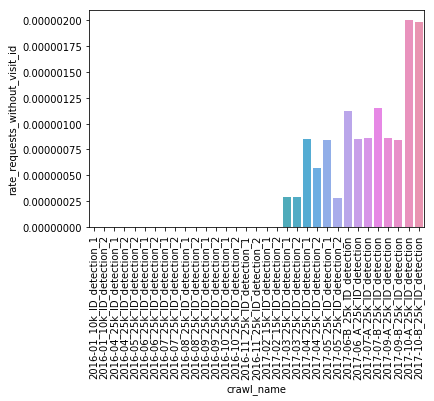

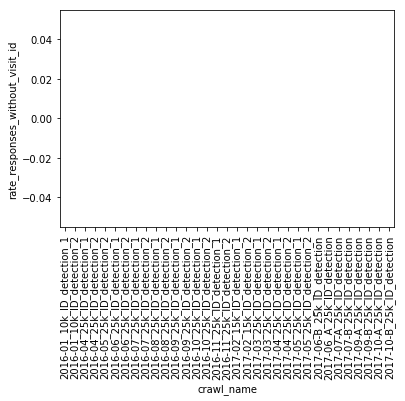

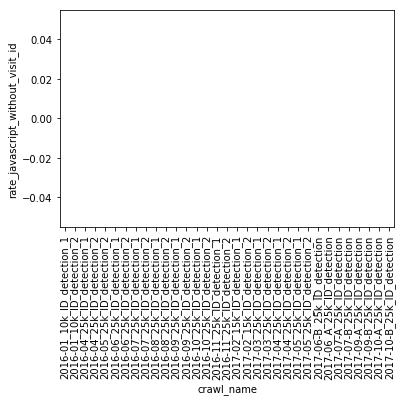

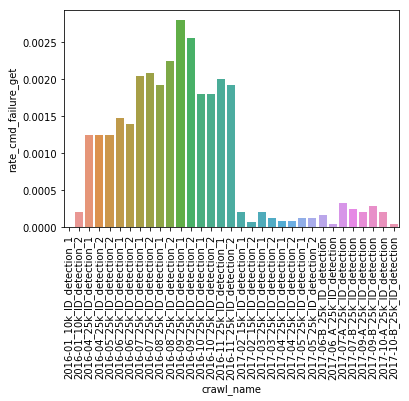

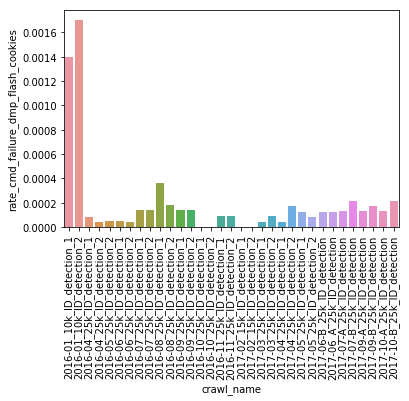

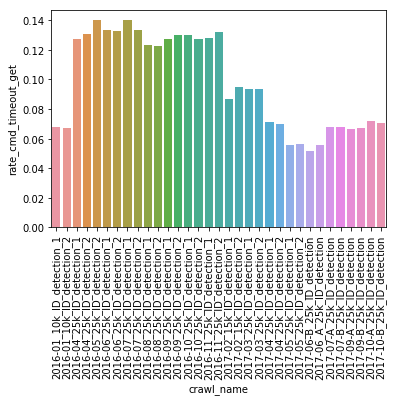

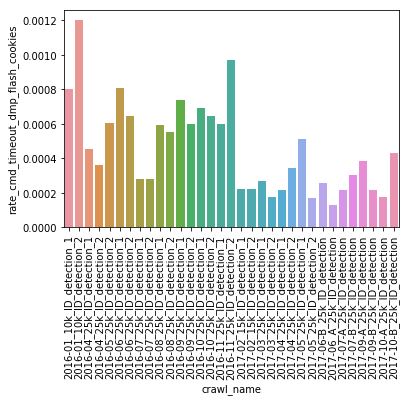

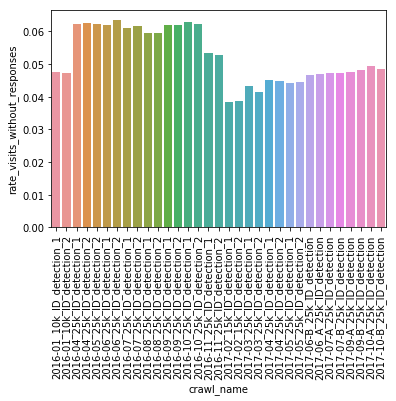

In [7]:
plot_all_metrics(crawl_metrics, "ID_detection", metrics_to_exclude=["browse"])

## Spider crawls

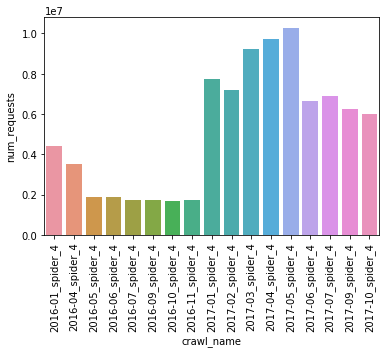

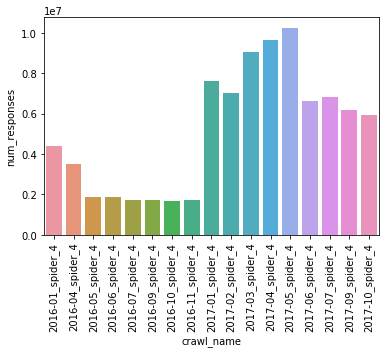

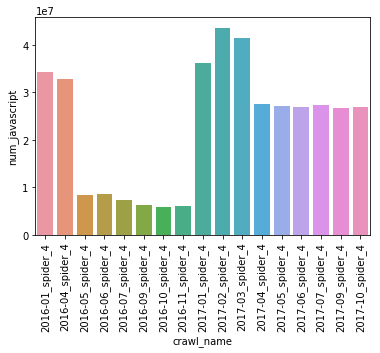

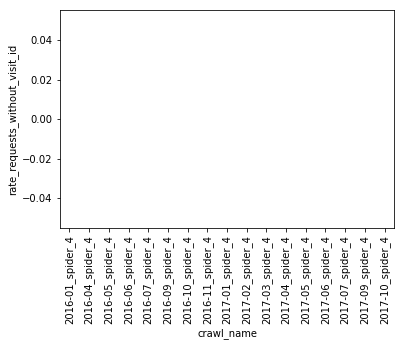

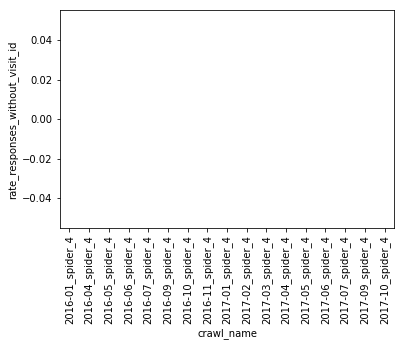

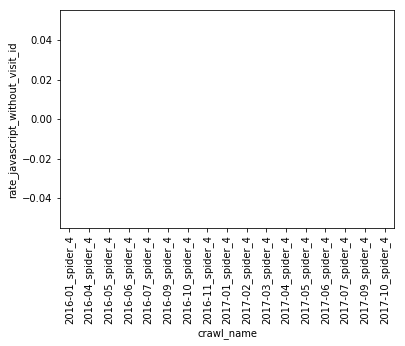

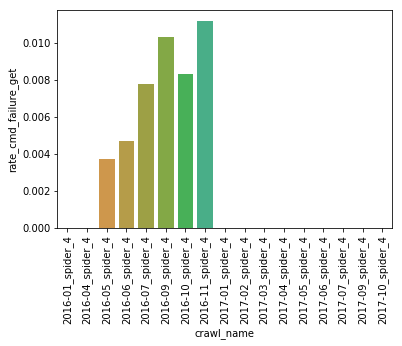

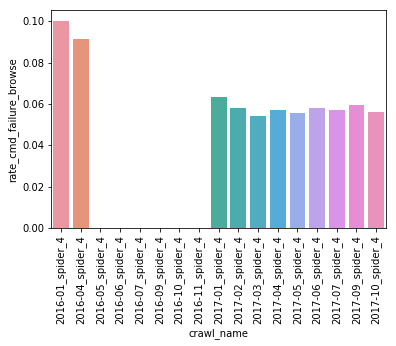

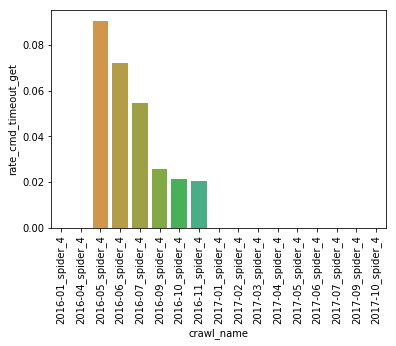

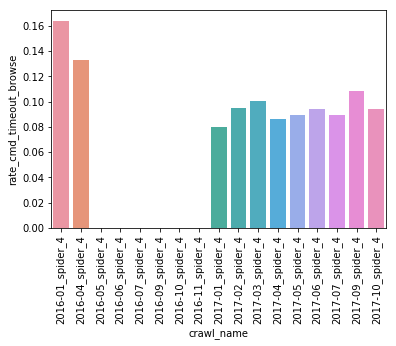

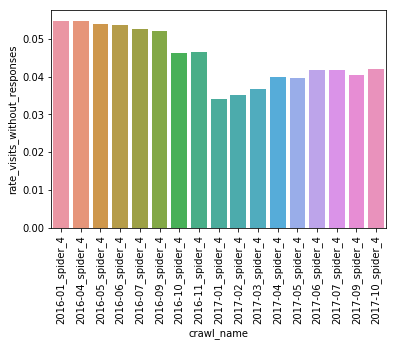

In [8]:
plot_all_metrics(crawl_metrics, "spider", metrics_to_exclude=["dmp_flash_cookies"])

## Stateful crawls

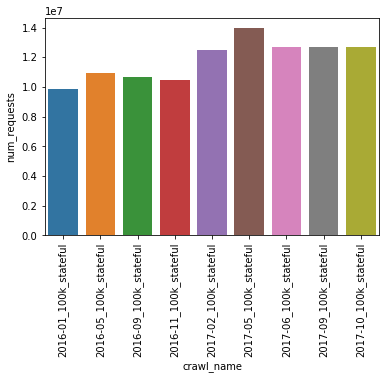

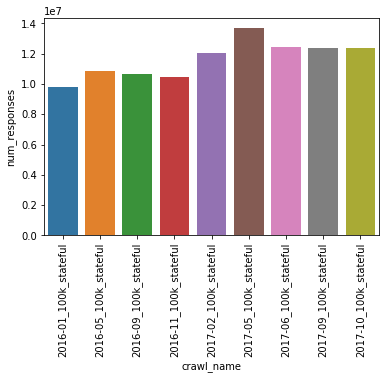

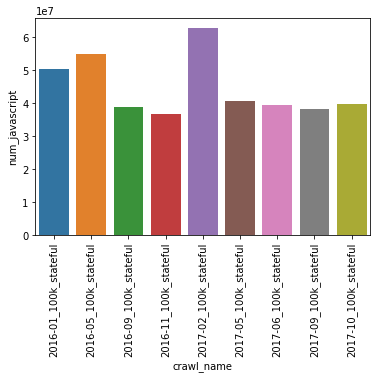

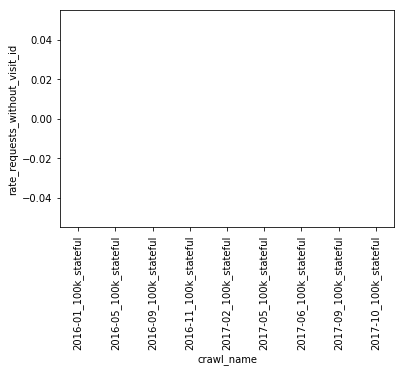

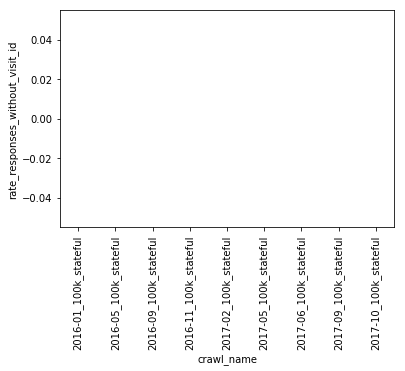

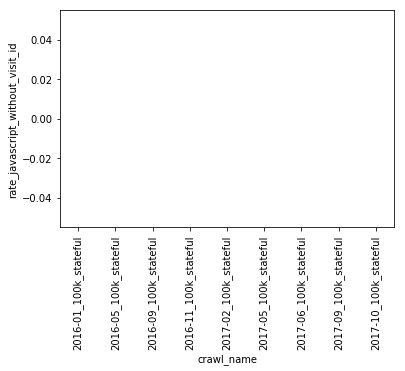

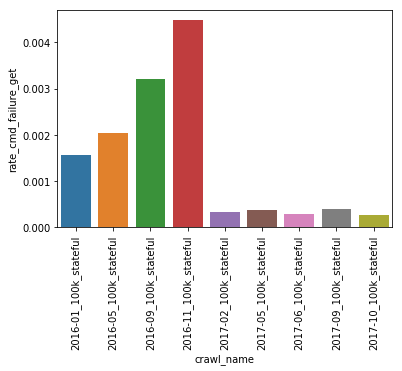

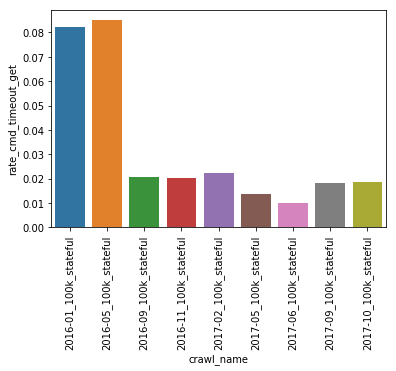

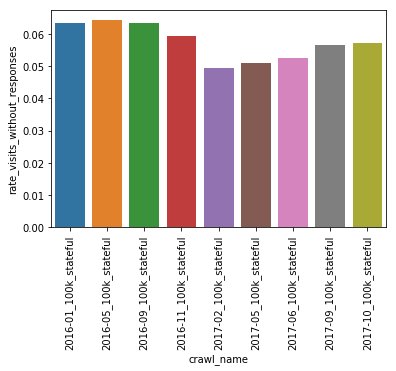

In [9]:
plot_all_metrics(crawl_metrics, "stateful", metrics_to_exclude=["browse", "dmp_flash_cookies"])

## Blocking - block cookies

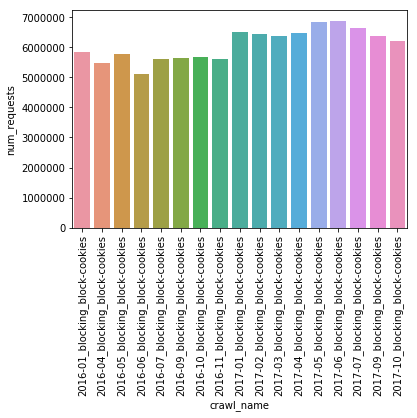

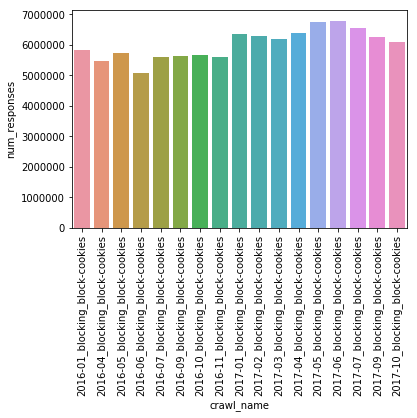

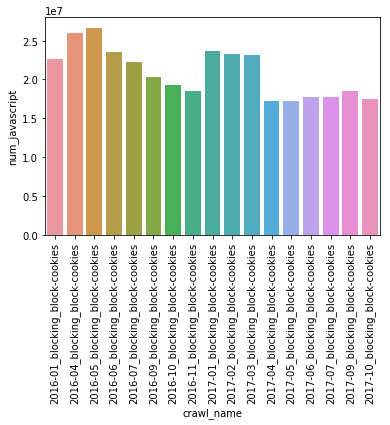

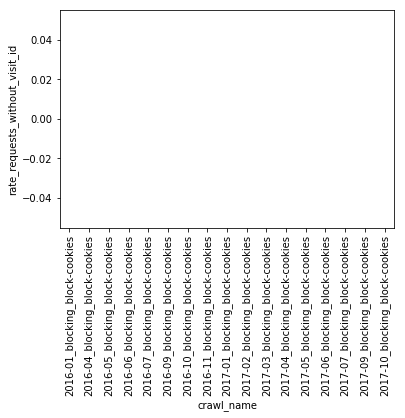

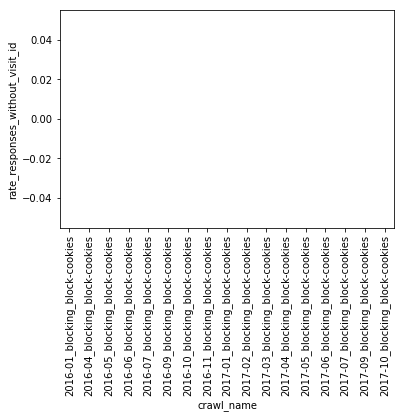

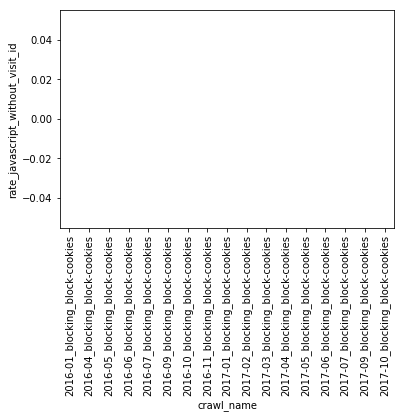

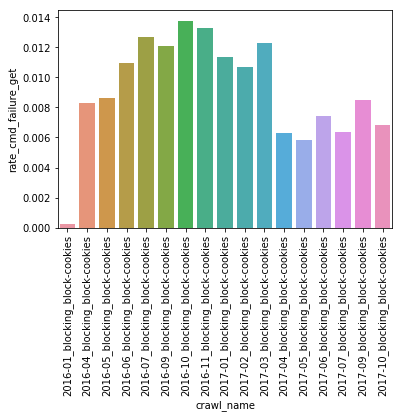

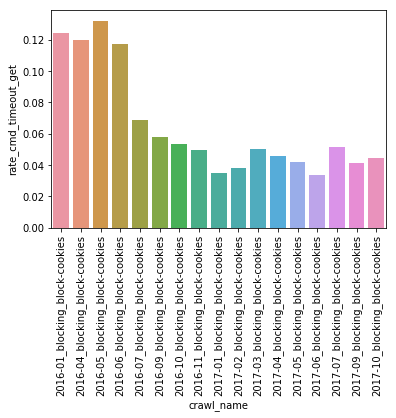

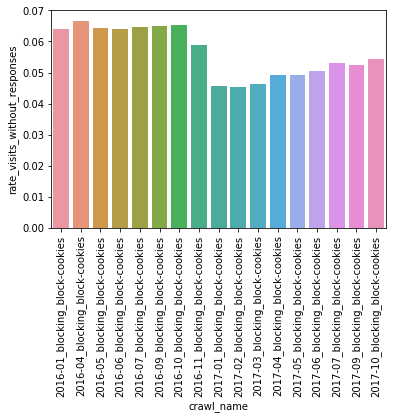

In [10]:
plot_all_metrics(crawl_metrics, "blocking_block-cookies", metrics_to_exclude=["browse", "dmp_flash_cookies"])

## Blocking - DNT (blocking_donottrack)

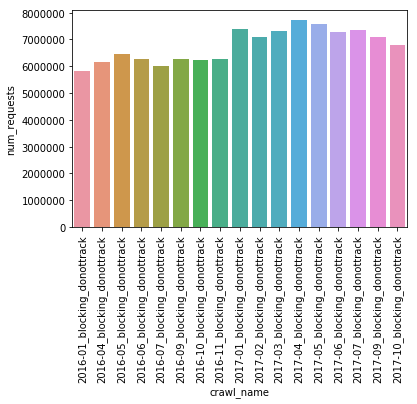

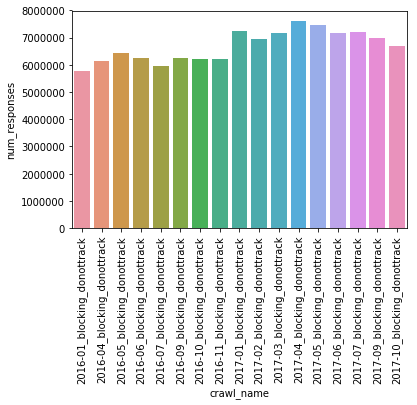

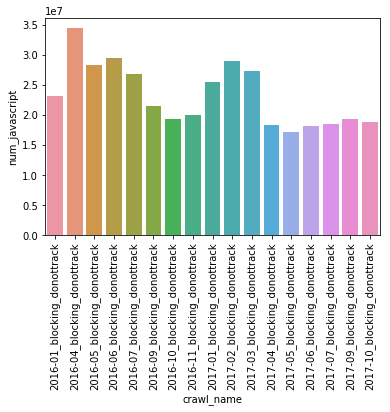

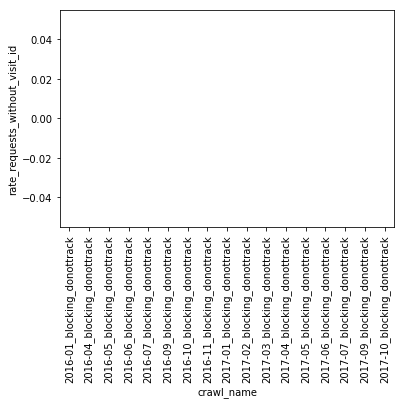

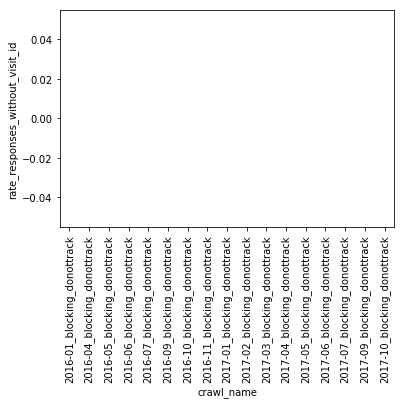

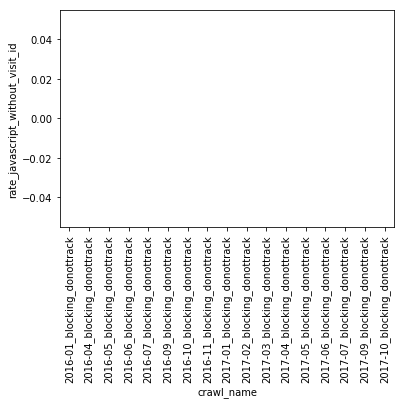

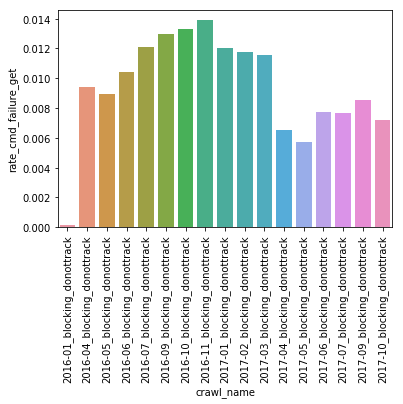

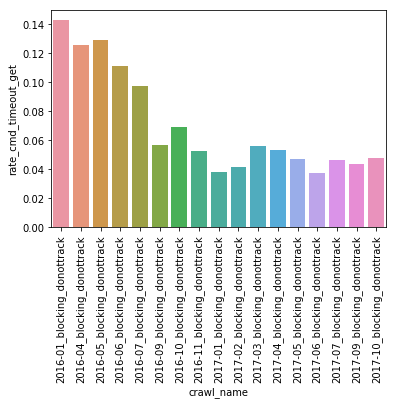

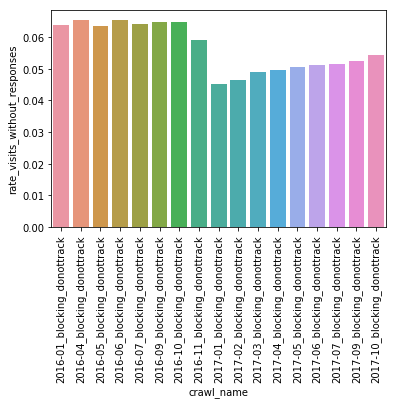

In [11]:
plot_all_metrics(crawl_metrics, "blocking_donottrack", metrics_to_exclude=["browse", "dmp_flash_cookies"])

## Blocking - Ghostery (blocking_ghostery)

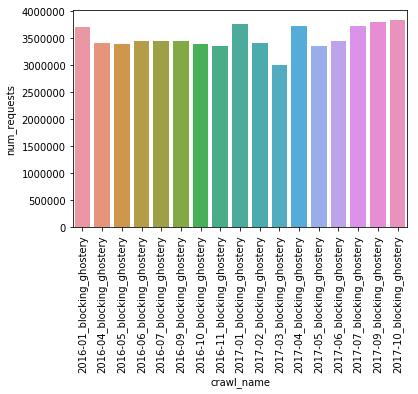

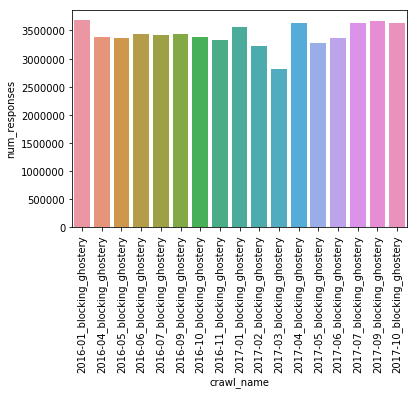

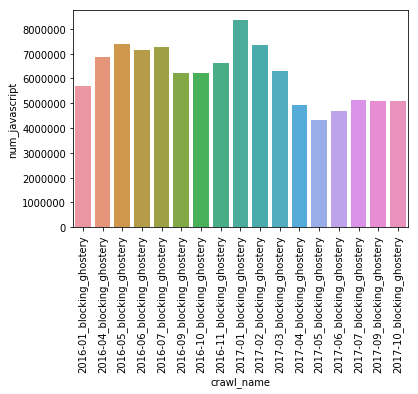

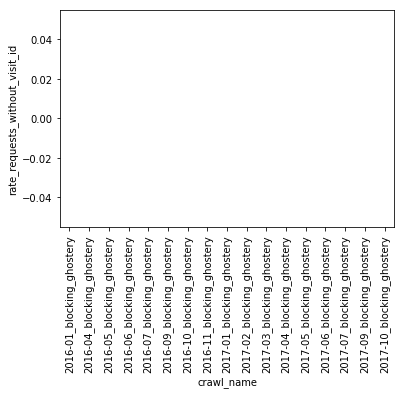

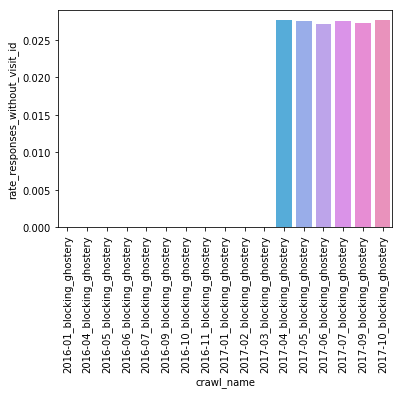

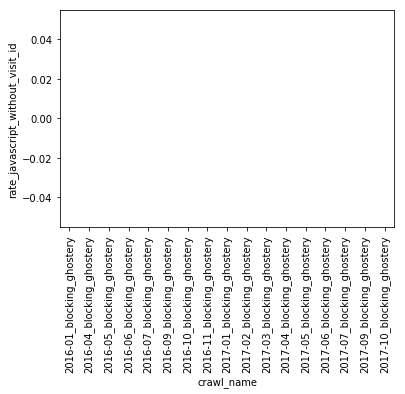

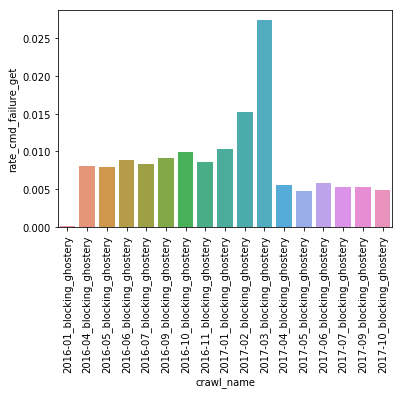

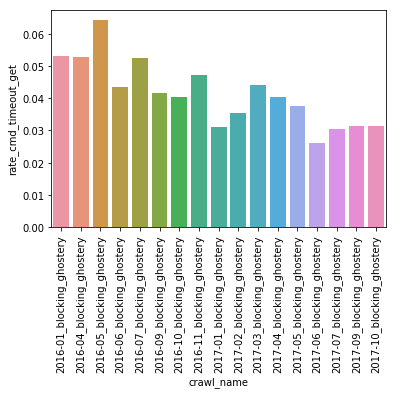

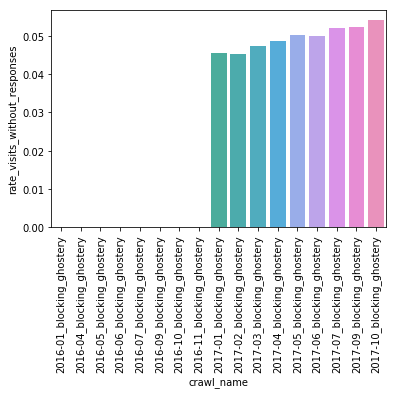

In [12]:
plot_all_metrics(crawl_metrics, "blocking_ghostery", metrics_to_exclude=["browse", "dmp_flash_cookies"])

## Blocking - HTTPS Everywhere (blocking_https-everywhere)

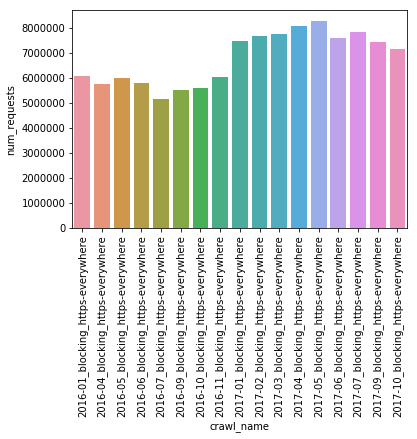

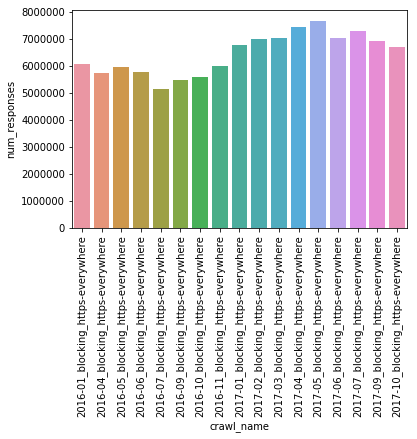

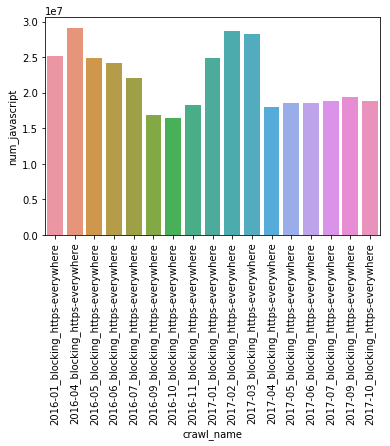

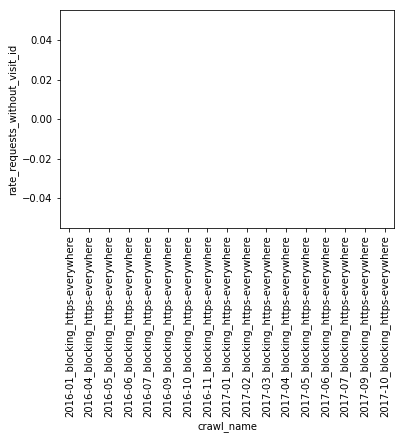

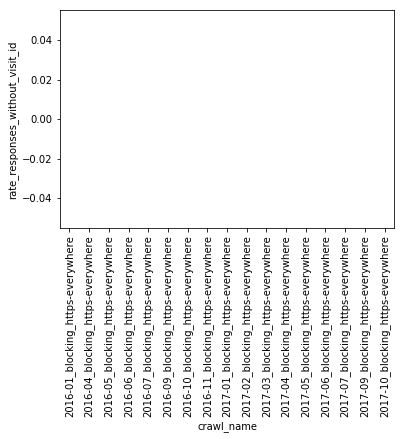

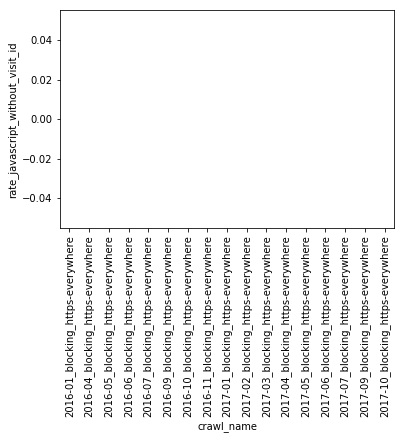

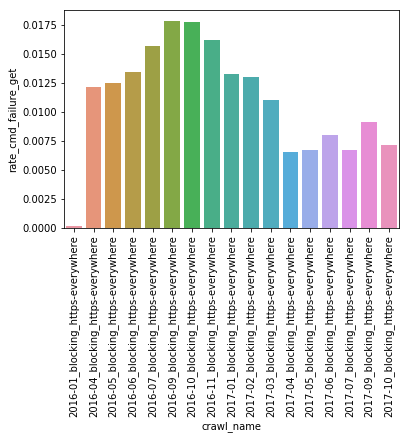

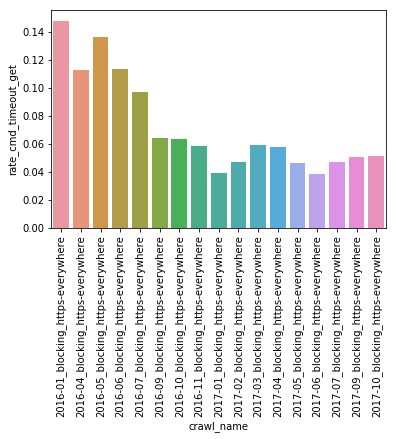

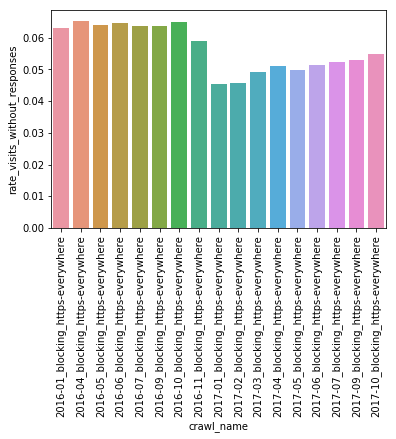

In [13]:
plot_all_metrics(crawl_metrics, "blocking_https-everywhere", metrics_to_exclude=["browse", "dmp_flash_cookies"])